In [10]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import math
pi=math.pi

In [11]:
#enter the state
state='010'
circuit=QuantumCircuit(3,3)
circuit.h([0,1,2])
circuit.barrier()
for j in range(2):
    for i in range(len(state)):
        if int(state[i])==0:
            circuit.x([-i-1])
    circuit.cu1(math.pi/2,[1],[2])
    circuit.cx([0],[1])
    circuit.cu1(-math.pi/2,[1],[2])
    circuit.cx([0],[1])
    circuit.cu1(math.pi/2,[0],[2])
    for i in range(len(state)):
        if int(state[i])==0:
            circuit.x([-i-1])
    circuit.barrier()
    circuit.h([0,1,2])
    circuit.x([0,1,2])
    circuit.cu1(math.pi/2,[1],[2])
    circuit.cx([0],[1])
    circuit.cu1(-math.pi/2,[1],[2])
    circuit.cx([0],[1])
    circuit.cu1(math.pi/2,[0],[2])
    circuit.x([0,1,2])
    circuit.h([0,1,2])
    circuit.barrier()


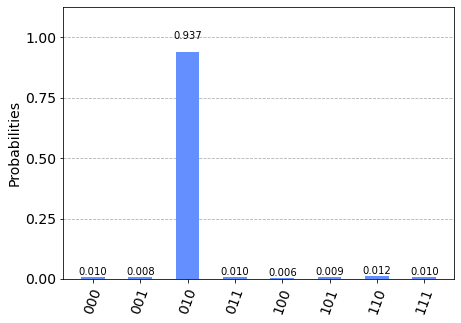

In [12]:
circuit.measure([0,1,2],[0,1,2])
backend=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=backend,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

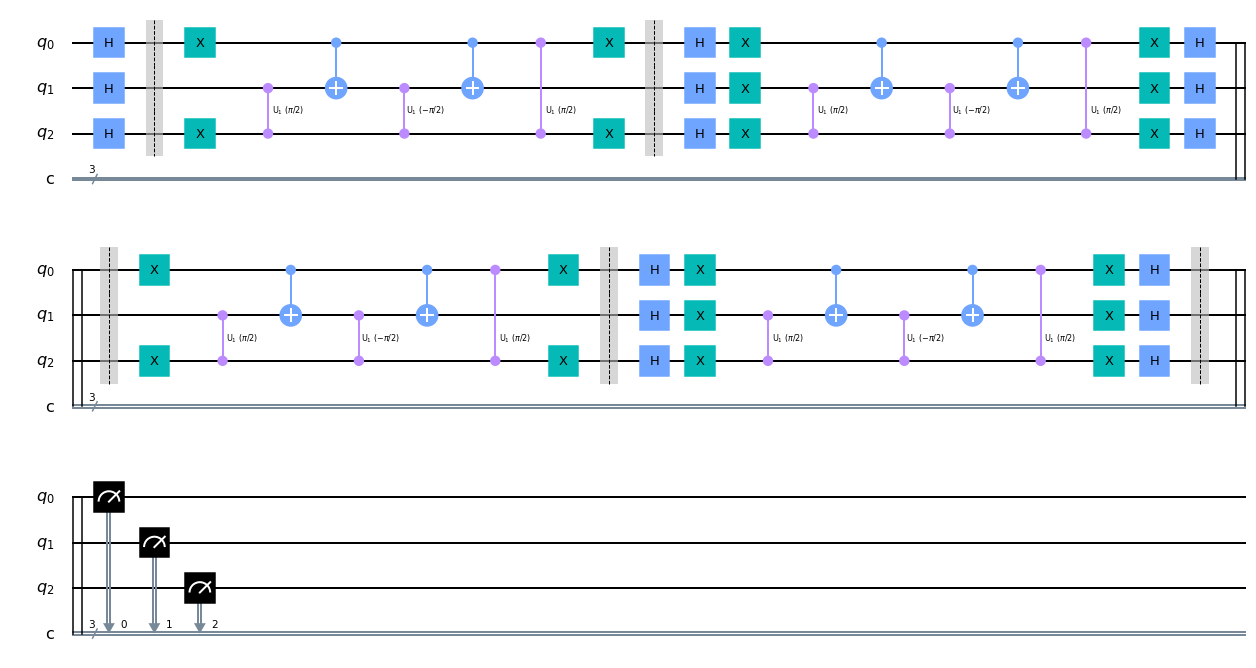

In [13]:
%matplotlib inline
circuit.draw(output='mpl')